# Técnicas de Agregación


Los árboles de predicción, al igual que todo modelo estadístico, sufren el
problema de la relación de equilibrio entre el bias y la varianza. El término
 bias hace referencia a cuánto  se alejan las predicciones de un modelo respecto
 a los valores reales. La varianza hace referencia a cuánto varía el
modelo  dependiendo del conjunto con el que realizamos el entrenamiento.
Cuanto mayor sea la complejidad de un modelo, es posible adaptarlo al
problema que se quiere resolver, reduciendo el bias y mejorando su capacidad
de predicción. Sin embargo, es peligroso tener un modelo tan ajustado al
conjunto de entrenamiento que presenta una alta varianza y es incapaz de adaptarse
a nuevas observaciones, entonces es cuándo aparece el  problema del sobreajuste.
El modelo ideal es aquel que consigue un buen equilibrio entre bias y varianza.

Estos términos se pueden trasladar a los árboles de decisión vistos en la
sección anterior. De manera general, los árboles pequeños no serán capaces de
representar de manera correcta la relación existente entre las variables, por
lo que tienden a tener un alto bias, pero poca varianza. En cambio, los árboles
grandes se ajustan mucho a los datos de entrenamiento, por lo
que tienen menor bias pero una alta varianza.

Tal como se describe en la introducción del capítulo __bagging__, __random
forests__ y __boosting__ son técnicas que utilizan los árboles de decisión como
las piezas elementales para construir  modelos de predicción con mejores
resultados, consiguiendo un mejor equilibrio entre el bias y la varianza.


## Bagging
**NOTA:** Traduir bagging? He vist recursos on ho tradueixen com Agregación de
bootstrap o empaquetado, si es tradueix ho faria amb empaquetado


Los árboles de decisión sufren de una gran varianza, esto significa que si
dividimos los datos de entrenamiento en dos partes de manera aleatoria, y
construimos un árbol de decisión para cada una de las dos mitades, los
árboles resultantes que obtenemos podrían ser muy diferentes. Un
procedimiento  con baja varianza producirá resultados similares si se aplica
a distintos conjuntos de datos.


La técnica que aquí se presenta, _bagging_, es un procedimiento diseñado para
reducir la varianza de un método de aprendizaje estadístico. Dado un
conjunto de $n$ observaciones independientes $Z_1, \ldots, Z_n$ cada una de
ellas con su propia varianza $ \sigma^2$, la varianza de la media de estas
observaciones $\overline{Z}$ es  $ \frac{\sigma^2}{n}$. Por lo
tanto, una forma natural de reducir la varianza y, por lo tanto, aumentar la
precisión de la predicción de un método de aprendizaje es construir
diferentes conjuntos de entrenamiento, construir un modelo de
predicción separado usando cada uno de los conjuntos y realizar el promedio
de las predicciones resultantes.

Desgraciadamente, normalmente no tenemos suficientes datos para crear
diferentes conjuntos de entrenamiento. Es por este motivo que se aplica la
técnica de _bootstrap_: simularemos los diferentes conjuntos de
entrenamiento necesarios para construir diferentes árboles y reducir la
varianza del clasificador. Esto se consigue extrayendo repetidos subconjuntos
de la muestra original. Estos subconjuntos deben extraerse
utilizando un muestreo con reposición, de tal forma que algunos elementos no
serán  seleccionados y otros lo podrán ser más de una vez en cada muestreo.
(_referenciar al Hasting capítol 5_)

Para aplicar la técnica de _bagging_ construiremos un conjunto de árboles de
regresión usando diferentes conjuntos de entrenamiento con la técnica de
_bootstrapping_ y daremos como resultado final el promedio de las
predicciones individuales de cada uno de los árboles que forman el conjunto.
Estos árboles crecen profundamente y  no se podan . Al promediar el
resultado de cada uno de estos árboles evidentemente, se consigue reducir la
varianza. Se ha demostrado que el _bagging_ proporciona mejoras  en la
precisión de los resultado al combinar un gran número de árboles en un
solo modelo.

Hasta ahora, hemos descrito el procedimiento de _bagging_ en  el caso de
querer solventar un problema aplicando una regresión. Esta técnica también
es aplicable a problemas de clasificación, en este caso se
toma la clase que es predicha con mayor frecuencia por los diferentes árboles,
es decir usamos la moda de las predicciones.

Según lo explicado anteriormente, sabemos que cada árbol
individual tiene una alta varianza, pero un bajo sesgo ya que comom hemos
comentado són árboles son profundos. Al obtener información agregada del
conjunto  árboles conseguimos reducir la varianza.


### Cálculo de el error (_out-of-bag_)


Cuando usamos la técnica de _bootstrapping_ existe una manera  sencilla de
estimar el error del método sin necesidad de realizar validación cruzada
o crear un subconjunto específico de validación.

El hecho de  que los árboles se ajusten de forma repetida empleando muestras
generadas por _bootstrapping_ conlleva que en promedio, cada árbol solamente
usa alrededor de dos tercios de las observaciones originales. Al
tercio restante se le llama _out-of-bag_ (OOB). Si para cada árbol construido
se registran las observaciones empleadas, se puede predecir la respuesta de
una observación haciendo uso de aquellos árboles en los que esa observación
ha sido excluida (OOB) y promediándolos si queremos realizar una tarea de
regresión o obteniendo la moda en el caso que queramos realizar una tarea de
clasificación.

Siguiendo este proceso, se pueden  obtener las predicciones para las todas
las observaciones y con ellas calcular el conocido como _OOB-mean square error_
para casos de regresión o el _OOB-classification error_ para árboles de
clasificación. Como la variable respuesta de cada observación se predice
empleando únicamente los árboles en cuyo ajuste no participó dicha
observación,  este cálculo sirve como estimación del
error del conjunto de test.  (**Depen de si s'ha explicat o no**) _De hecho, si
el número de árboles es suficientemente alto, el OOB-error es prácticamente
equivalente al leave-one-out cross-validation error_.  Esto evita
tener  que recurrir al proceso de cross-validation para la optimización de
los hiperparámetros.


### Un ejemplo de _bagging_

Como hemos explicado anteriormente esta técnica es aplicable a diferentes
métodoes de aprendizaje. En el paquete _sklearn.ensemble_ de Scikit
encontramos las clases _BaggingClassifier_ y _BaggingRegressor_ que usan los
árboles de decisión como técnica por defecto.

Vamos a ver un ejemplo de clasificación con esta técnica:

Preparacion de libreria y datos

In [53]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#TODO AMAGAR

#%matplotlib inline
#sns.set_style("whitegrid")
#plt.style.use("fivethirtyeight")

max_estimadores = 200
estimadores = list(range(1, max_estimadores, 1))

In [10]:
# TODO:Amagar
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        #print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        #print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

df = pd.read_csv("img/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[col_to_scale] = s_sc.fit_transform(df[col_to_scale])

X = df.drop('target', axis=1)
y = df.target



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

Clasificamos usando un solo árbol (baseline)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_predicted = tree.predict(X_test)
score_decision_tree = accuracy_score(y_test, y_predicted)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



**Bagging**

In [66]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

results = []
for e in estimadores:
    bagging = BaggingClassifier(n_estimators=e, random_state=42)
    bagging.fit(X_train, y_train)
    y_predicted = bagging.predict(X_test)
    score = accuracy_score(y_test, y_predicted)
    results.append(score)

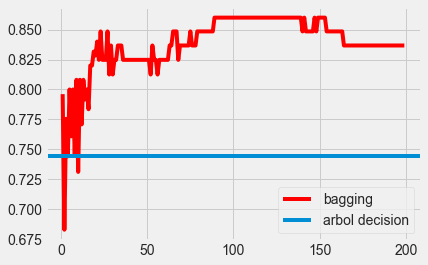

In [55]:
import matplotlib.pyplot as plt

plt.plot(estimadores, results, "r", label= "bagging")
plt.axhline(y=score_decision_tree, label="arbol decision")
plt.legend();


## Random Forest

Los _random forests_ son una técnica que al igual que la técnica de
_bagging_ consiste en la agregación de diversos árboles para proporcionar una
decisión conjunta creando diferentes conjuntos de entrenamiento  mediante
_bootstrapping_. Esta nueva técnica que presentamos consigue una mejora de
rendimiento respecto a la técnica  de _bagging_.

La particularidad que diferencia a los _random forest_ a la técnica
anteriormente mencionada es que al construir
cada  uno de los árboles de decisión, cada vez que se realiza una división de
un  nodo en un árbol, se elige de manera  aleatoria un subconjunto, $m$, de
características. Este nueva división solo podrá ser realizada usando una
característica que pertenezca al conjunto $m$. Cada vez que se realiza una nueva
división se vuelve a generar este conjunto, el valor por defecto de $m \simeq
\sqrt{p}$ donde $p$ es el número total de características.

En resumen, al construir un _random forest_, el algoritmo no considerará la
mayoría de las características disponibles en cada nueva división de un nodo
del árbol. Esto permite construir árboles que serán muy diferentes entre si y
también evitar que existan características que dominantes.

Una de las problemáticas que surgen del uso de la técnica de _bagging_ es la
similitud de todos los árboles construidos. Desafortunadamente, realizar
el promedio de muchos valores altamente correlacionados no conduce a una gran
reducción de la varianza como cuando promediamos muchos valores no
correlacionados.
Esto significa que la técnica de _bagging_ no proporcionará una gran
reducción de la varianza comparando con la que tenemos con la construcción de
un solo árbol. Los _random forest_ estan diseñados para  solventar esta problemática al
considerar un subconjunto de todas las características disponibles en cada
división.

La principal diferencia entre _bagging_ y _random forest_ es  la elección del
tamaño del subconjunto del predictor, si un _random forest_ se
construye usando  $m = p$, equivale a realizar la técnica de
_bagging_.

### Un ejemplo de Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

results_rf = []
for e in estimadores:
    random_forest = RandomForestClassifier(n_estimators=e, random_state=42)
    random_forest.fit(X_train, y_train)
    y_predicted = random_forest.predict(X_test)
    score = accuracy_score(y_test, y_predicted)
    results_rf.append(score)

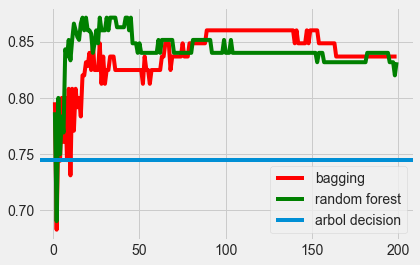

In [57]:
import matplotlib.pyplot as plt

plt.plot(estimadores, results, "r", label= "bagging")
plt.plot(estimadores, results_rf, "g", label= "random forest")
plt.axhline(y=score_decision_tree, label="arbol decision")
plt.legend();

## Boosting

La última técnica que vamos a describir en este capítulo es el _boosting_,
que también servirá para mejorar los resultados de predicción de los
árboles de decisión y del _bagging_. Al igual que en la técnica de
_bagging_, el _boosting_ es un enfoque general que se puede aplicar a
diversos métodos de aprendizaje automático para tareas de regresión o de
clasificación.

Recordemos que al aplicar la técnica de _bagging_ creamos múltiples
subconjuntos de entrenamiento usando _bootsrapping_ y entrenamos un árbol para
cada uno  de estos subconjuntos, luego combinamos todos los árboles para crear
un modelo predictivo único. La técnica de _boosting_  funciona de una manera
similar, excepto que en este caso los árboles crecen de manera  secuencial,
por este motivo se dice que la técnica de _boosting_ implica un  aprendizaje
lento, ya que la construcción de cada árbol se basa en información de los
árboles construidos previamente. En _boosting_ no construimos diferentes
conjuntos de entrenamiento usando _bootstrapping_ sino que cada árbol se
ajusta sobre una versión ponderada del conjunto de datos original.


El proceso de entrenamiento es iterativo, se realizan $B$ pasos, tantos com
el número de árboles que tendrá el modelo final. Cada muestra del conjunto
de  entrenamiento tendrá un peso asociado, en un principio todas tendrán el mismo.
_A continuación explicaremos
el proceso de _boosting_ para las tareas de clasificación, para realizar una
regresión con esta técnica el proceso es similar._


En primer lugar entrenamos un árbol, calculamos el error de este
clasificador y recalculamos los pesos de las muestras del conjunto de
entrenamiento. Las muestras mal clasificadas tendrán pesos mayores que
aquellas que han sido bien clasificadas.

En cada paso siguiente agregamos un nuevo árbol para intentar corregir el error
del modelo hasta ese momento. Al calcular el índice Gini o la
Entropia de una división deberemos tener en cuenta el peso de las
observaciones, así en los nuevos clasificadores damos importancia a las
observaciones que hasta ese momento no habían sido bien clasificadas. El
final de este paso, es el mismo que el primero: calculamos el error del
modelo con la incorporación de este clasificador y reajustamos los pesos de
las muestras del conjunto de entrenamiento.

En el momento de realizar una predicción cada clasificador individual, cada
árbol, contribuirá de manera ponderada a la decisión final con el objetivo de
dar mayor influencia a los clasificadores más precisos.

En este caso, los árboles que forman el modelo suelen ser bastante
pequeños, poco profundos, comparando con las técnicas anteriores. Cuentan con
con pocos  nodos terminales. Estos estan determinados por el parámetro $d$.

Existen tres parámetros que permiten ajustar esta técnica:

1. El número de árboles $B$. A diferencia de las técnicas de _bagging_ y  de
_random forest_, esta técnica puede llegar al sobreajuste (__overfitting__)
sobre el conjunto de entrenamiento si $B$ es demasiado grande, aunque este
tiende a ocurrir lentamente. Para seleccionar el mejor parámetro de $B$ se
recomienda usar la validación cruzada.

2. El ratio de aprendizaje $λ$. Es un número positivo de valor muy pequeño que
controla la velocidad a la que aprende el método. Los valores típicos son 0
.01 o 0.001, su elección final depende del problema. Si
elegimos un valor muy pequeño para $λ$ normalmente necesitaremos
seleccionar un valor muy grande de $B$ para lograr un buen rendimiento.

3. El número de divisiones en cada árbol, $d$. Controla la
complejidad del conjunto potenciado. Normalmente, usar $d = 1$ funciona bien,
en cuyo caso cada árbol consta de tres únicos nodos, el nodo raíz y dos nodos
hoja.

### Un ejemplo de Boosting

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score
estimators = list(range(1, 1000, 10))
results_boosting = []
for e in estimadores:
    boosting = AdaBoostClassifier(n_estimators=e, random_state=42)
    boosting.fit(X_train, y_train)
    y_predicted = boosting.predict(X_test)
    score = accuracy_score(y_test, y_predicted)
    results_boosting.append(score)

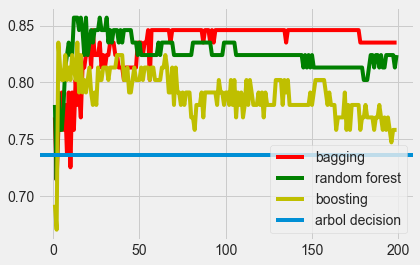

In [70]:
import matplotlib.pyplot as plt

plt.plot(estimadores, results, "r", label= "bagging")
plt.plot(estimadores, results_rf, "g", label= "random forest")
plt.plot(estimadores, results_boosting, "y", label= "boosting")
plt.axhline(y=score_decision_tree, label="arbol decision")
plt.legend();


## Determinar la importancia de las características

**NOTA**: Discutir que i com posar-ho o si va a un dels capítols de final.




# Un ejemplo completo

**NOTA:** aquí la meva idea seria fer un exemple de classificació comparant
arbres simples amb alguna de les tècniques anteriors. Fer selecció dels
millors parametres i mostrar com canvia el resultat amb el nombre d'estimadors.



# Resumen

**NOTA:**

* Comentar que tant en els arbres individuals com en les tècnicques
d'agregació ne le cas de classif es pot donar %

* En resumen, el  promedio de un conjunto de observaciones permite reducir la
varianza.




## Ejercicios